In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import the data
df = pd.read_csv(r"C:\Users\akshayd6\Desktop\MyModels\Loan Default Prediction Capstone\Final Dataset.csv",index_col = 'Customer_id')

In [4]:
data = df.copy()

In [5]:
#code to display all columns of dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [6]:
df.rename(columns = {'cons.conf.idx': 'consumer_confidence_index'},inplace = True)

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,contact,Campaign_month,day_of_week,duration,campaign,pdays,previous,poutcome,y,Postal Code,State_Name,City_Name,Region_Name
Customer_id,,,,,,,,,,,,,,,,,,,,,,,,,
1,56,services,married,high school,no,no,yes,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no,42420,Kentucky,Henderson,South
2,45,services,married,basic 9y,unknown,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no,42420,Kentucky,Henderson,South
3,59,admin,married,professional course,no,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no,90036,California,Los Angeles,West
4,41,blue collar,married,unknown,unknown,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no,33311,Florida,Fort Lauderdale,South
5,24,technician,single,professional course,no,yes,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no,33311,Florida,Fort Lauderdale,South


In [8]:
df.shape

(37084, 25)

### Exploratory data analysis

### Age

In [9]:
df['age'].describe()

count    37084.000000
mean        40.042714
std         10.432965
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [10]:
df['age'].median()

38.0

C:\Users\akshayd6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

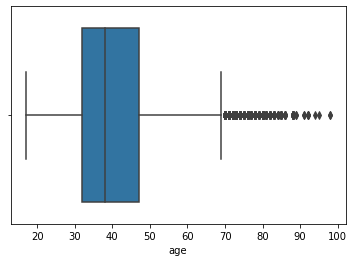

In [11]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='y'>

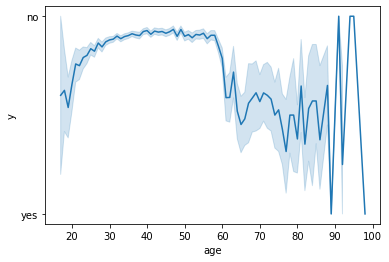

In [12]:
sns.lineplot(x = df.age, y = df.y)

<b>From the line plot 3 things can be observed:<br></b><br>
    1. People between the age >20-57 generally respond negatively to the campaign.<br>
    2. People with age > 57 generally respond positively to the campaign.<br>

### Treating outliers with IQR method and comparing line plots

In [13]:
df1 = df.copy()

In [14]:
def IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    ul = int(Q3+1.5*IQR)
    ll = int(Q1-1.5*IQR)
    print("Upper limit = ",ul)
    print("Lower limit = ",ll)
    return ul,ll

In [15]:
ul,ll = IQR(df.age)

Upper limit =  69
Lower limit =  9


In [16]:
def iqrloop(str,ul,ll):
    for i in range(df.shape[0]):
        if df[str].iloc[i] > ul:
            df[str].iloc[i] = ul
        elif df[str].iloc[i] <= ll:
            df[str].iloc[i] = ll
        else:
            continue

In [17]:
if ll<0:
    ll = 0
iqrloop('age',ul,ll)

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_18628\2373591362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str].iloc[i] = ul


C:\Users\akshayd6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

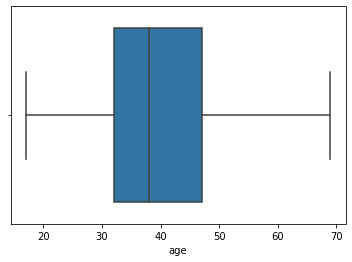

In [18]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='age', ylabel='y'>

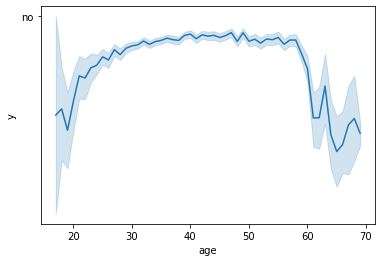

In [19]:
sns.lineplot(x = df.age, y = df.y)

### Job

In [20]:
df.job.value_counts(normalize = True)

admin            0.254018
blue collar      0.224194
technician       0.164384
services         0.095648
management       0.071109
retired          0.041554
entrepreneur     0.035298
self-employed    0.034408
housemaid        0.025510
unemployed       0.024943
student          0.020683
unknown          0.008252
Name: job, dtype: float64

>only .02% values are uknown so we can replace it with admin

In [21]:
for i in range(df.shape[0]):
    if df.job.iloc[i] == 'unknown':
        df.job.iloc[i] = 'admin'

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_18628\1534549118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.job.iloc[i] = 'admin'


In [22]:
df.job.value_counts(normalize = True)

admin            0.262269
blue collar      0.224194
technician       0.164384
services         0.095648
management       0.071109
retired          0.041554
entrepreneur     0.035298
self-employed    0.034408
housemaid        0.025510
unemployed       0.024943
student          0.020683
Name: job, dtype: float64

<AxesSubplot:xlabel='job', ylabel='count'>

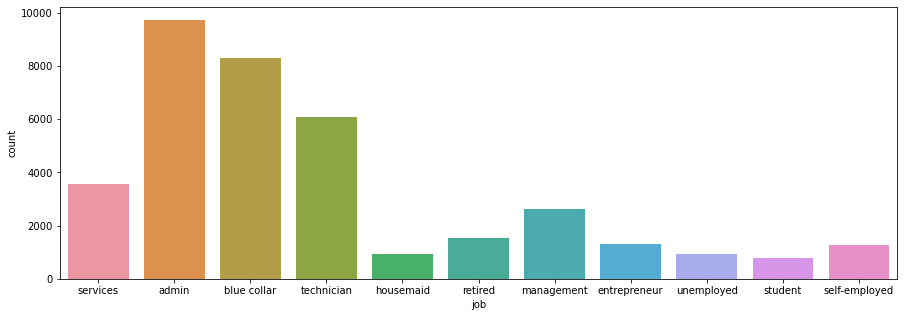

In [23]:
plt.figure(figsize = (15,5))
sns.countplot(x = df.job)

### Marital status

In [24]:
df.marital.value_counts(normalize = True)

married     0.606164
single      0.280633
divorced    0.111261
unknown     0.001942
Name: marital, dtype: float64

>unknown is only 0.002% so we can replace it with married

In [25]:
for i in range(df.shape[0]):
    if df.marital.iloc[i] == 'unknown':
        df.marital.iloc[i] = 'married'

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_18628\2111152359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.marital.iloc[i] = 'married'


In [26]:
df.marital.value_counts(normalize = True)

married     0.608106
single      0.280633
divorced    0.111261
Name: marital, dtype: float64

<AxesSubplot:xlabel='marital', ylabel='count'>

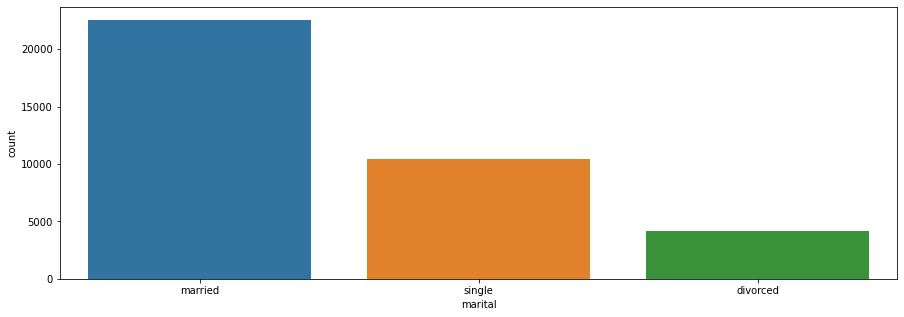

In [27]:
plt.figure(figsize = (15,5))
sns.countplot(x = df.marital)

### Education

In [28]:
df.education.value_counts(normalize = True)

university degree      0.295842
high school            0.230342
basic 9y               0.146182
professional course    0.127980
basic 4y               0.101526
basic 6y               0.055927
unknown                0.041770
illiterate             0.000431
Name: education, dtype: float64

>Here unknown values only amounts to 4% so this can be replaced with university degree

In [29]:
for i in range(df.shape[0]):
    if df.education.iloc[i] == 'unknown':
        df.education.iloc[i] = 'university degree'

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_18628\1206357953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education.iloc[i] = 'university degree'


<AxesSubplot:xlabel='education', ylabel='count'>

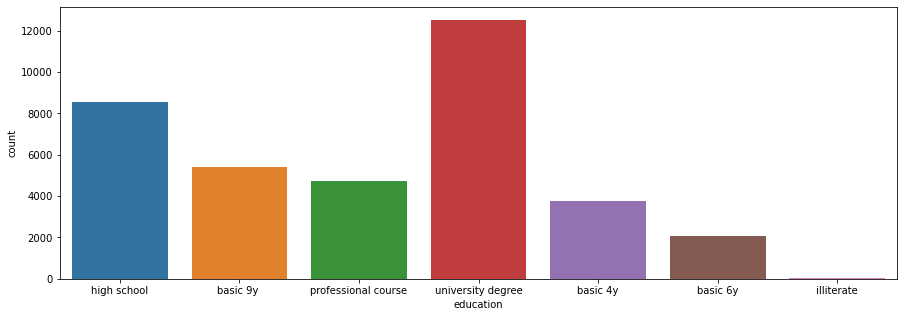

In [30]:
plt.figure(figsize = (15,5))
sns.countplot(x = df.education)

### Default

In [31]:
df.default.value_counts(normalize = True)

no         0.792309
unknown    0.207637
yes        0.000054
Name: default, dtype: float64

<AxesSubplot:xlabel='default', ylabel='count'>

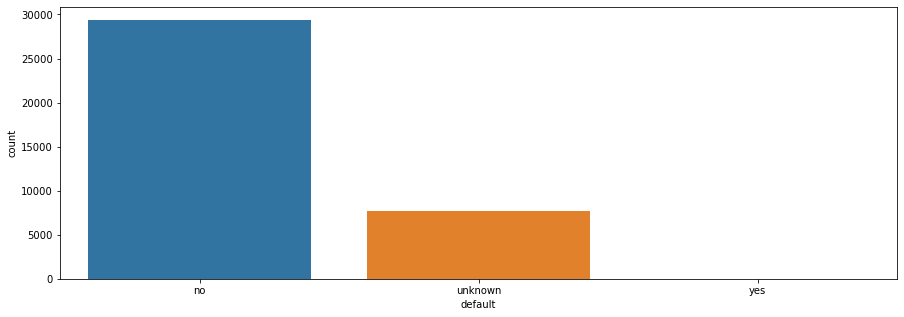

In [32]:
plt.figure(figsize = (15,5))
sns.countplot(x = df.default)

>Let's keep it untouched for now. We will perform statistical tests to check whether this variable influences the taget variable.

### Housing

In [33]:
df.housing.value_counts(normalize = True)

yes        0.524027
no         0.452190
unknown    0.023784
Name: housing, dtype: float64

>Here unknown values amount only to 2% so it can be replaced with yes

In [34]:
for i in range(df.shape[0]):
    if df.housing.iloc[i] == 'unknown':
        df.housing.iloc[i] = 'yes'

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_18628\444130107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.housing.iloc[i] = 'yes'


<AxesSubplot:xlabel='housing', ylabel='count'>

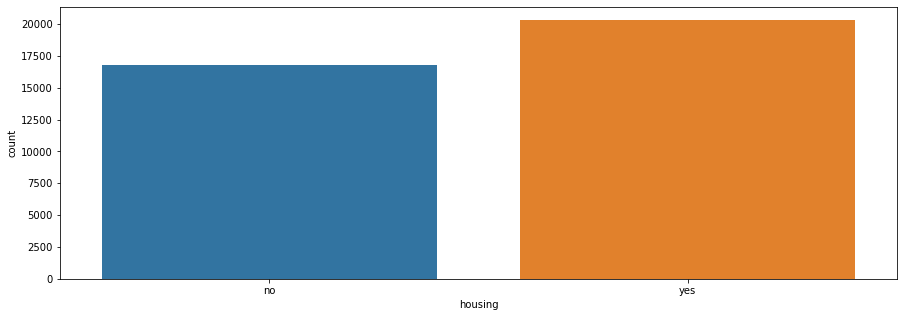

In [35]:
plt.figure(figsize = (15,5))
sns.countplot(x = df.housing)

### Loan

In [36]:
df.loan.value_counts(normalize = True)

no         0.824102
yes        0.152114
unknown    0.023784
Name: loan, dtype: float64

>Here unknown only amounts to 2%. so we can replace it with no

In [37]:
for i in range(df.shape[0]):
    if df.loan.iloc[i] == 'unknown':
        df.loan.iloc[i] = 'no'

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_18628\237063864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loan.iloc[i] = 'no'


<AxesSubplot:xlabel='loan', ylabel='count'>

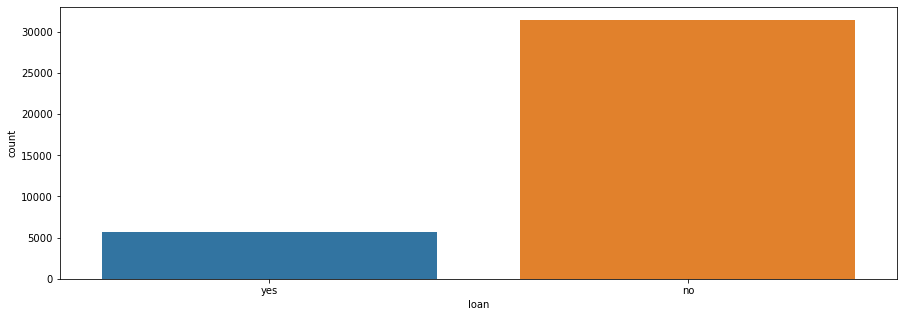

In [38]:
plt.figure(figsize = (15,5))
sns.countplot(x = df.loan)

### Employee Variation Rate, Consumer price index, Consumer Confidence index, Euribor, Number employed

In [39]:
df.employee_variation_rate.value_counts(normalize = True)

 1.4    0.393647
-1.8    0.223681
 1.1    0.188761
-0.1    0.089769
-2.9    0.040017
-3.4    0.025564
-1.7    0.018768
-1.1    0.015317
-3.0    0.004234
-0.2    0.000243
Name: employee_variation_rate, dtype: float64

In [40]:
df.consumer_price_index.value_counts(normalize = True)

93.994    0.188761
93.918    0.161390
92.893    0.140815
93.444    0.125769
94.465    0.106488
93.200    0.088070
93.075    0.060026
92.201    0.018660
92.963    0.016961
92.431    0.010544
92.649    0.008656
94.215    0.007604
94.199    0.007389
92.843    0.006768
93.369    0.006364
92.379    0.006364
94.055    0.005609
94.027    0.005555
93.876    0.005339
94.601    0.004746
92.469    0.004395
93.749    0.004368
92.713    0.004234
94.767    0.003182
93.798    0.001699
92.756    0.000243
Name: consumer_price_index, dtype: float64

In [41]:
df.consumer_confidence_index.value_counts(normalize = True)

-36.4    0.188761
-42.7    0.161390
-46.2    0.140815
-36.1    0.125769
-41.8    0.106488
-42.0    0.088070
-47.1    0.060026
-31.4    0.018660
-40.8    0.016961
-26.9    0.010544
-30.1    0.008656
-40.3    0.007604
-37.5    0.007389
-50.0    0.006768
-34.8    0.006364
-29.8    0.006364
-39.8    0.005609
-38.3    0.005555
-40.0    0.005339
-49.5    0.004746
-33.6    0.004395
-34.6    0.004368
-33.0    0.004234
-50.8    0.003182
-40.4    0.001699
-45.9    0.000243
Name: consumer_confidence_index, dtype: float64

In [42]:
df.euribor.value_counts(normalize = True)

4.857    0.070327
4.962    0.063424
4.963    0.060484
4.961    0.045815
4.856    0.029069
           ...   
3.816    0.000027
0.933    0.000027
3.853    0.000027
1.574    0.000027
3.879    0.000027
Name: euribor, Length: 314, dtype: float64

In [43]:
df.number_employed.value_counts(normalize = True)

5228.1    0.393647
5099.1    0.207610
5191.0    0.188761
5195.8    0.089769
5076.2    0.040017
5017.5    0.025564
4991.6    0.018768
5008.7    0.016072
4963.6    0.015317
5023.5    0.004234
5176.3    0.000243
Name: number_employed, dtype: float64

### Contact

In [44]:
df.contact.value_counts(normalize = True)

cellular     0.63429
telephone    0.36571
Name: contact, dtype: float64

In [45]:
df.Campaign_month.value_counts(normalize = True)

may    0.334915
jul    0.173390
aug    0.149984
jun    0.129058
nov    0.099908
apr    0.064394
oct    0.016988
sep    0.013753
mar    0.013132
dec    0.004476
Name: Campaign_month, dtype: float64

C:\Users\akshayd6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Campaign_month', ylabel='count'>

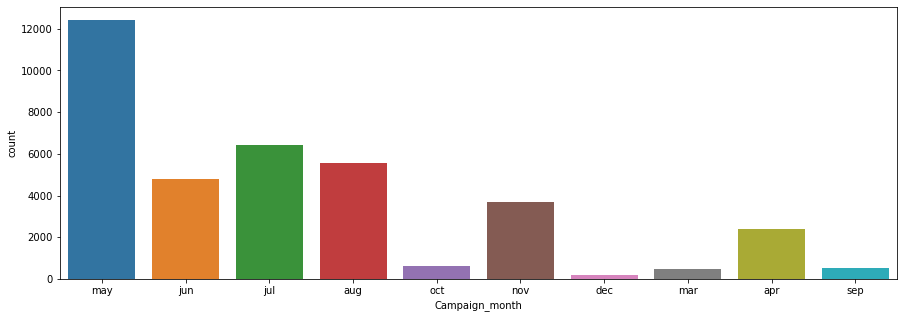

In [46]:
plt.figure(figsize = (15,5))
sns.countplot(df.Campaign_month)

### Day of Week

In [47]:
df.day_of_week.value_counts(normalize = True)

thu    0.209740
mon    0.206855
wed    0.197956
tue    0.195826
fri    0.189624
Name: day_of_week, dtype: float64

C:\Users\akshayd6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

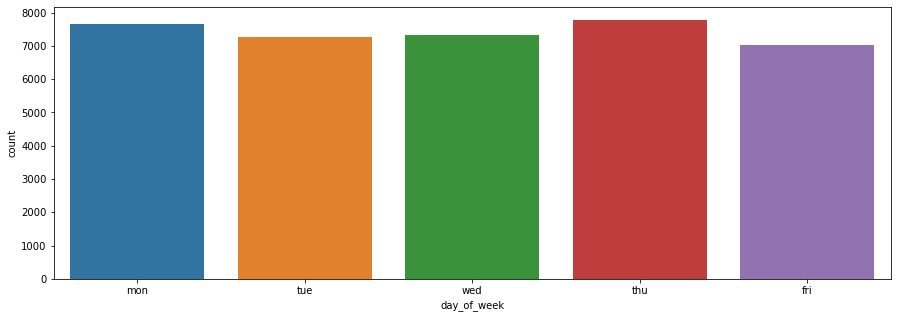

In [48]:
plt.figure(figsize = (15,5))
sns.countplot(df.day_of_week)

### Duration

In [49]:
df.duration.describe()

count    37084.000000
mean       258.237946
std        258.730909
min          0.000000
25%        102.000000
50%        180.000000
75%        319.250000
max       4918.000000
Name: duration, dtype: float64

C:\Users\akshayd6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

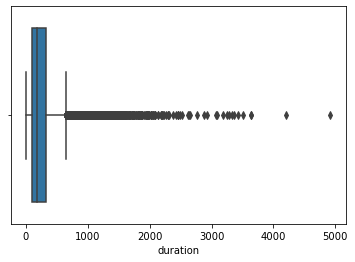

In [50]:
sns.boxplot(df.duration)

In [51]:
ul,ll = IQR(df.duration)

Upper limit =  645
Lower limit =  -223


In [52]:
if ll<0:
    ll = 0
iqrloop('duration',ul,ll)

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_18628\2373591362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str].iloc[i] = ul
C:\Users\akshayd6\AppData\Local\Temp\ipykernel_18628\2373591362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str].iloc[i] = ll


C:\Users\akshayd6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

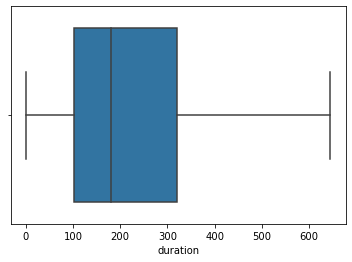

In [53]:
sns.boxplot(df.duration)

### Campaign

In [54]:
df.campaign.describe()

count    37084.000000
mean         2.569545
std          2.770611
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [55]:
df.pdays.describe()

count    37084.000000
mean       962.530849
std        186.773063
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [56]:
df.pdays.value_counts(normalize = True)

999    0.963273
3      0.010732
6      0.009735
4      0.002831
9      0.001537
2      0.001510
12     0.001456
7      0.001375
10     0.001240
5      0.001160
13     0.000917
11     0.000755
1      0.000674
14     0.000539
15     0.000512
8      0.000485
0      0.000324
16     0.000297
17     0.000216
18     0.000108
22     0.000081
19     0.000081
21     0.000054
25     0.000027
26     0.000027
27     0.000027
20     0.000027
Name: pdays, dtype: float64

In [57]:
df.previous.value_counts(normalize = True)

0    0.863526
1    0.110587
2    0.018418
3    0.005124
4    0.001726
5    0.000458
6    0.000135
7    0.000027
Name: previous, dtype: float64

In [58]:
df.poutcome.value_counts(normalize = True)

nonexistent    0.863526
failure        0.103063
success        0.033411
Name: poutcome, dtype: float64

In [59]:
df.y.value_counts(normalize = True)

no     0.886528
yes    0.113472
Name: y, dtype: float64

In [60]:
df['Postal Code'].value_counts(normalize = True)

10035    0.026265
10009    0.023325
10024    0.022921
94122    0.020332
10011    0.019766
           ...   
57401    0.000081
60441    0.000081
34741    0.000081
6810     0.000081
44035    0.000081
Name: Postal Code, Length: 631, dtype: float64

In [61]:
df.State_Name.value_counts(normalize = True)

California              0.200275
New York                0.113580
Texas                   0.097454
Pennsylvania            0.058785
Washington              0.050723
Illinois                0.048862
Ohio                    0.046705
Florida                 0.038022
Michigan                0.025860
North Carolina          0.024809
Arizona                 0.022759
Virginia                0.021896
Georgia                 0.018660
Colorado                0.018364
Tennessee               0.017744
Indiana                 0.015155
Kentucky                0.014022
Massachusetts           0.013240
New Jersey              0.012917
Oregon                  0.012404
Wisconsin               0.010894
Maryland                0.010625
Delaware                0.009519
Minnesota               0.009357
Connecticut             0.008171
Oklahoma                0.006688
Missouri                0.006607
Alabama                 0.006337
Arkansas                0.006202
Utah                    0.005528
Rhode Isla

In [62]:
df.City_Name.value_counts(normalize = True)

New York City        0.092277
Los Angeles          0.074992
Philadelphia         0.053824
San Francisco        0.051397
Seattle              0.042876
                       ...   
Davis                0.000081
Arlington Heights    0.000081
San Luis Obispo      0.000081
Springdale           0.000081
Danbury              0.000081
Name: City_Name, Length: 531, dtype: float64

In [63]:
df.Region_Name.value_counts(normalize = True)

West       0.320462
East       0.284705
Central    0.231636
South      0.161579
X          0.001618
Name: Region_Name, dtype: float64

In [64]:
for i in range(df.shape[0]):
    if df.Region_Name.iloc[i] == 'X':
        df.Region_Name.iloc[i] = 'West'

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_18628\1166731461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Region_Name.iloc[i] = 'West'


C:\Users\akshayd6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region_Name', ylabel='count'>

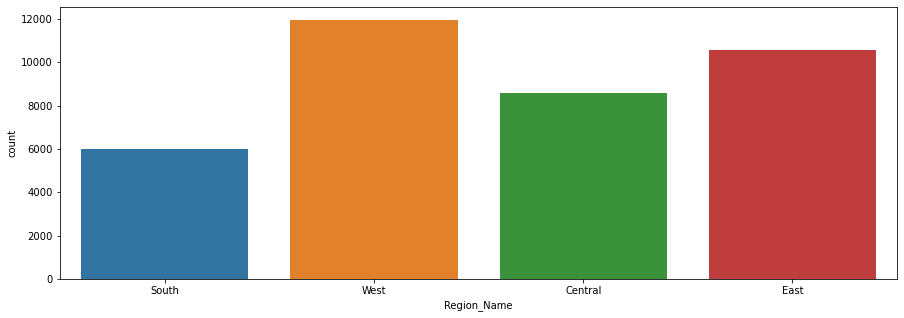

In [65]:
plt.figure(figsize = (15,5))
sns.countplot(df.Region_Name)

In [66]:
df.head()

,age,job,marital,education,default,housing,loan,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,contact,Campaign_month,day_of_week,duration,campaign,pdays,previous,poutcome,y,Postal Code,State_Name,City_Name,Region_Name
Customer_id,,,,,,,,,,,,,,,,,,,,,,,,,
1,56,services,married,high school,no,no,yes,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no,42420,Kentucky,Henderson,South
2,45,services,married,basic 9y,unknown,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no,42420,Kentucky,Henderson,South
3,59,admin,married,professional course,no,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no,90036,California,Los Angeles,West
4,41,blue collar,married,university degree,unknown,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no,33311,Florida,Fort Lauderdale,South
5,24,technician,single,professional course,no,yes,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no,33311,Florida,Fort Lauderdale,South


In [75]:
df.to_csv('Cleaned Data.csv')